In [1]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt


import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import array


font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}
plt.rc('font', **font)


In [8]:

n_timestamp = 50
train_days = 1000  # number of days to train from
testing_days = 100 # number of days to be predicted
n_epochs = 50

#model_type = 2

In [9]:
dataset = pd.read_csv("project.csv")
'''
if filter_on == 1:
    dataset['t2m'] = medfilt(dataset['t2m'], 3)
    dataset['t2m'] = gaussian_filter1d(dataset['t2m'], 1.2)
'''

"\nif filter_on == 1:\n    dataset['t2m'] = medfilt(dataset['t2m'], 3)\n    dataset['t2m'] = gaussian_filter1d(dataset['t2m'], 1.2)\n"

In [10]:
print(dataset)

                time        t2m       u10       v10        d2m  sf   tp  \
0     01/01/17 12:00  295.18082 -0.026832 -1.329328  291.34882   0  0.0   
1     02/01/17 12:00  295.43665 -0.004036 -2.185710  290.84296   0  0.0   
2     03/01/17 12:00  296.14456  0.847509 -2.320151  290.34433   0  0.0   
3     04/01/17 12:00  294.43980  1.602373 -1.768268  289.98276   0  0.0   
4     05/01/17 12:00  295.22455  0.714612 -2.223091  289.77798   0  0.0   
...              ...        ...       ...       ...        ...  ..  ...   
1090  27/12/19 12:00  289.52295  1.060921 -1.491845  286.83713   0  0.0   
1091  28/12/19 12:00  290.90780  0.376872 -2.208812  286.73590   0  0.0   
1092  29/12/19 12:00  291.76440  1.231489 -1.822173  286.97748   0  0.0   
1093  30/12/19 12:00  291.93250  0.189813 -2.204160  287.38837   0  0.0   
1094  31/12/19 12:00  292.03370  2.183758 -0.975096  288.26600   0  0.0   

      longitude   latitude  
0     88.379997  22.879999  
1     88.379997  22.879999  
2     88.379

In [11]:
train_set = dataset[0:train_days].reset_index(drop=True)
test_set = dataset[train_days: train_days+testing_days].reset_index(drop=True)
training_set = train_set.iloc[:, 1:2].values
testing_set = test_set.iloc[:, 1:2].values

In [12]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(testing_set)

In [13]:
def data_split(sequence, n_timestamp):
    X = []
    y = []
    for i in range(len(sequence)):
        end_ix = i + n_timestamp
        if end_ix > len(sequence)-1:
            break
    
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


X_train, y_train = data_split(training_set_scaled, n_timestamp)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test, y_test = data_split(testing_set_scaled, n_timestamp)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:

    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))


In [15]:
# Start training
#
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = n_epochs, batch_size = 32)
loss = history.history['loss']
epochs = range(len(loss))



Epoch 1/50
30/30 [==============================] - 4s 49ms/step - loss: 0.2252
Epoch 2/50
30/30 [==============================] - 2s 51ms/step - loss: 0.0126
Epoch 3/50
30/30 [==============================] - 1s 46ms/step - loss: 0.0103
Epoch 4/50
30/30 [==============================] - 1s 39ms/step - loss: 0.0108
Epoch 5/50
30/30 [==============================] - 1s 42ms/step - loss: 0.0107
Epoch 6/50
30/30 [==============================] - 1s 42ms/step - loss: 0.0099
Epoch 7/50
30/30 [==============================] - 1s 38ms/step - loss: 0.0099
Epoch 8/50
30/30 [==============================] - 1s 39ms/step - loss: 0.0099
Epoch 9/50
30/30 [==============================] - 1s 39ms/step - loss: 0.0098
Epoch 10/50
30/30 [==============================] - 1s 38ms/step - loss: 0.0099
Epoch 11/50
30/30 [==============================] - 1s 41ms/step - loss: 0.0093
Epoch 12/50
30/30 [==============================] - 1s 41ms/step - loss: 0.0092
Epoch 13/50
30/30 [==================

In [16]:
#
y_predicted = model.predict(X_test)

#
# 'De-normalize' the data
#
y_predicted_descaled = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

Text(0.5, 1.0, 'All data')

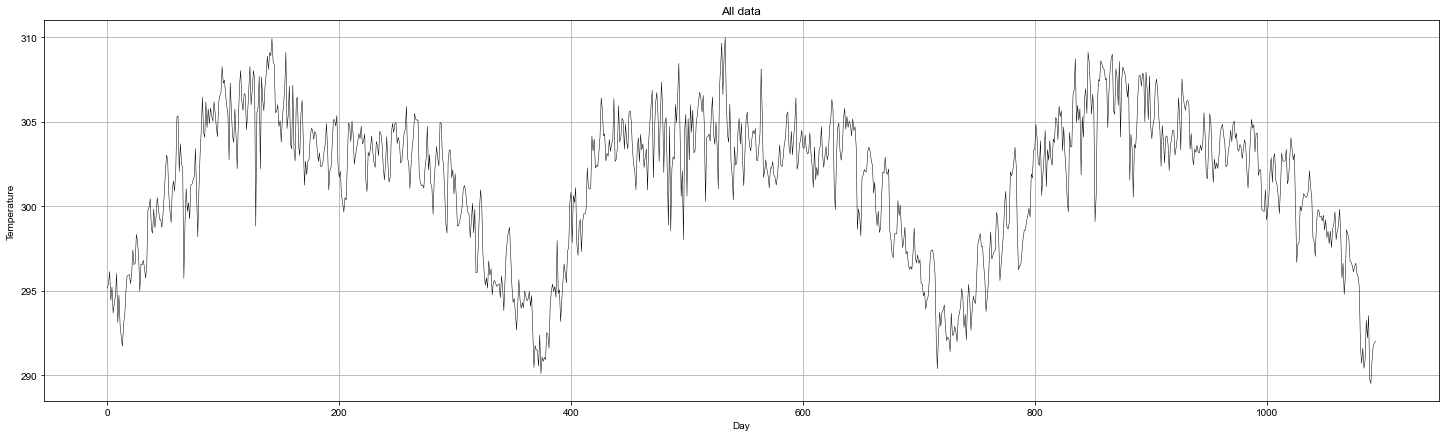

In [17]:

plt.figure(figsize=(25,7))
plt.plot(dataset['t2m'], color = 'black', linewidth=0.5, label = 'True value')
plt.grid()
plt.ylabel("Temperature")
plt.xlabel("Day")
plt.title("All data")

Text(0.5, 1.0, 'Predicted data (n days)')

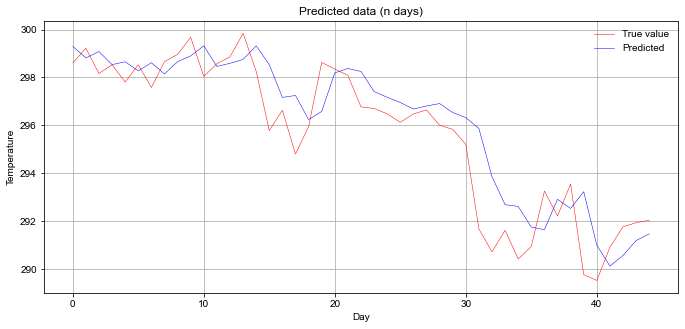

In [18]:
plt.figure(figsize=(25,17))
plt.subplot(3, 2, 3)
plt.plot(y_test_descaled, color = 'red', linewidth=0.5, label = 'True value')
plt.plot(y_predicted_descaled, color = 'blue',  linewidth=0.5, label = 'Predicted')
plt.grid()
plt.legend(frameon=False)
plt.ylabel("Temperature")
plt.xlabel("Day")
plt.title("Predicted data (n days)")

Text(0.5, 1.0, 'Predicted data (first 30 days)')

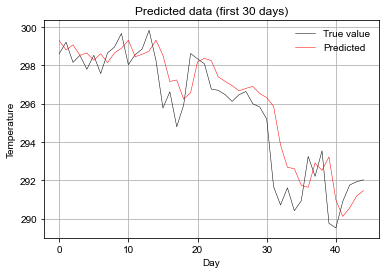

In [37]:
#plt.subplot(3, 2, 4)
plt.plot(y_test_descaled[0:75], color = 'black', linewidth=0.5, label = 'True value')
plt.plot(y_predicted_descaled[0:75], color = 'red',linewidth=0.5, label = 'Predicted')
plt.grid()
plt.legend(frameon=False)
plt.ylabel("Temperature")
plt.xlabel("Day")
plt.title("Predicted data (first 30 days)")

Text(0.5, 1.0, 'Training curve')

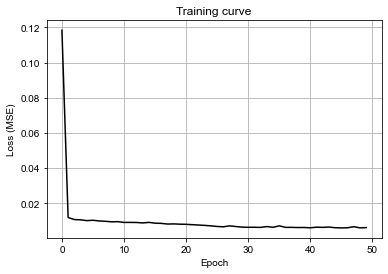

In [38]:
#plt.subplot(3, 3, 7)
plt.plot(epochs, loss, color='black')
plt.grid()
plt.ylabel("Loss (MSE)")
plt.xlabel("Epoch")
plt.title("Training curve")

Text(0.5, 1.0, 'Residual plot')

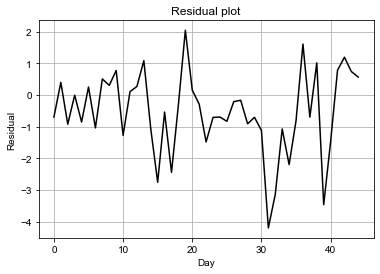

In [39]:
#plt.subplot(3, 3, 8)
plt.plot(y_test_descaled-y_predicted_descaled, color='black')
plt.grid()
plt.ylabel("Residual")
plt.xlabel("Day")
plt.title("Residual plot")

Text(0.5, 1.0, 'Scatter plot')

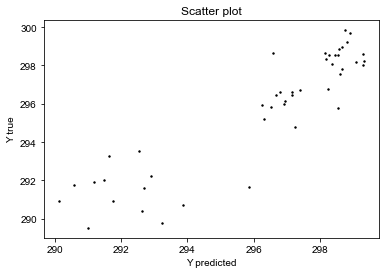

In [40]:
#plt.subplot(3, 3, 9)
plt.scatter(y_predicted_descaled, y_test_descaled, s=2, color='black')
plt.ylabel("Y true")
plt.xlabel("Y predicted")
plt.title("Scatter plot")

In [41]:
plt.subplots_adjust(hspace = 0.5, wspace=0.3)
plt.show()

<Figure size 432x288 with 0 Axes>

In [42]:
rmse = mean_squared_error(y_test_descaled, y_predicted_descaled,squared=False)
mse= mean_squared_error(y_test_descaled, y_predicted_descaled)
r2 = r2_score(y_test_descaled, y_predicted_descaled)
print("rmse=" + str(round(rmse,2)))
print("mse=" + str(round(mse,2)))
print("r^2=" + str(round(r2,2)))

rmse=1.4
mse=1.96
r^2=0.8


In [43]:
test = pd.DataFrame(y_test_descaled,columns=['Actual'])
pred = pd.DataFrame(y_predicted_descaled,columns=['Predict'])

In [44]:
results = pd.concat([test,pred],axis=1)

In [45]:
results.head(20)

,Actual,Predict
0,298.60657,299.298096
1,299.21793,298.815643
2,298.16077,299.079132
3,298.53003,298.533325
4,297.80307,298.653168
5,298.52940,298.273621
6,297.57720,298.613403
7,298.65780,298.146545
8,298.96550,298.657959
9,299.67465,298.896851
